# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [33]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [34]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [39]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 2.557658e-01
W2 max relative error: 1.256964e-08
b2 max relative error: 8.099550e-10
b1 max relative error: 8.116928e-10


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


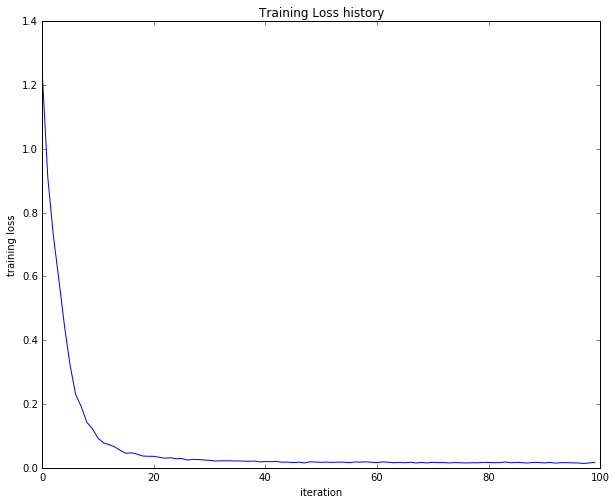

In [42]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [43]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [44]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

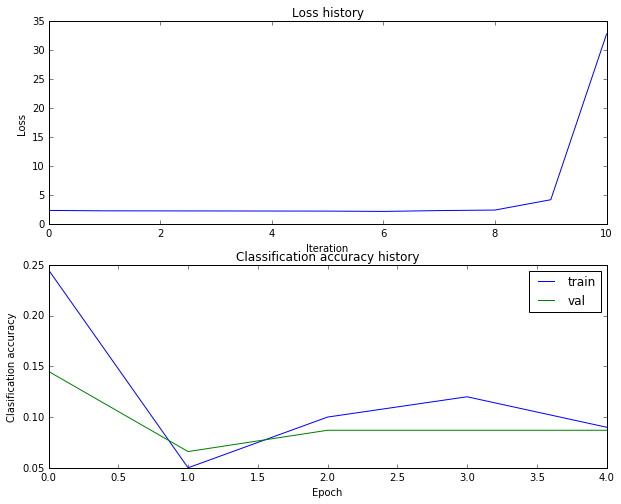

In [54]:
# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    t1, = plt.plot(stats['train_acc_history'], label='train')
    t2, = plt.plot(stats['val_acc_history'], label='val')
    plt.legend(handles=[t1, t2])
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

plot_stats(stats)

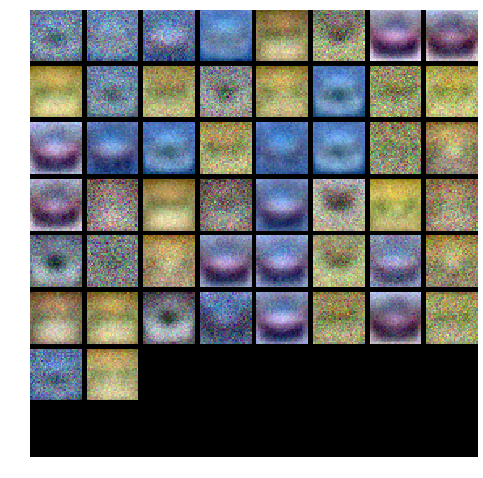

In [46]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

iteration 0 / 1000: loss 2.302978
iteration 100 / 1000: loss 2.299849
iteration 200 / 1000: loss 2.220018
iteration 300 / 1000: loss 2.132105
iteration 400 / 1000: loss 2.029000
iteration 500 / 1000: loss 1.943242
iteration 600 / 1000: loss 2.043895
iteration 700 / 1000: loss 1.987512
iteration 800 / 1000: loss 1.806916
iteration 900 / 1000: loss 1.916168
lr=0.000200 reg=0.500000 hidden_size=50.000000 lr_decay=0.800000
Training took 10s
Validation accuracy:  0.321


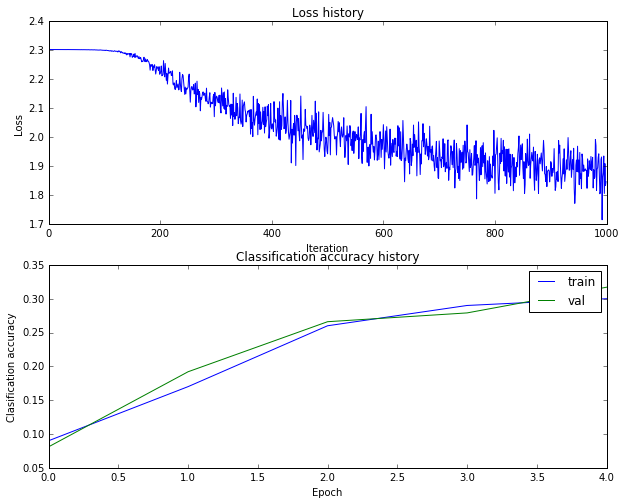

iteration 0 / 1000: loss 2.302953
iteration 100 / 1000: loss 2.298977
iteration 200 / 1000: loss 2.213293
iteration 300 / 1000: loss 2.120210
iteration 400 / 1000: loss 2.022327
iteration 500 / 1000: loss 1.891326
iteration 600 / 1000: loss 1.915498
iteration 700 / 1000: loss 1.728768
iteration 800 / 1000: loss 1.875191
iteration 900 / 1000: loss 1.737259
lr=0.000200 reg=0.500000 hidden_size=50.000000 lr_decay=0.900000
Training took 9s
Validation accuracy:  0.363


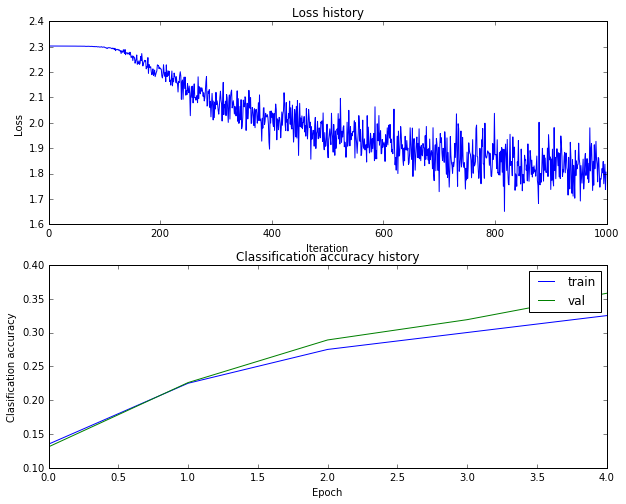

iteration 0 / 1000: loss 2.302963
iteration 100 / 1000: loss 2.298704
iteration 200 / 1000: loss 2.184300
iteration 300 / 1000: loss 2.110528
iteration 400 / 1000: loss 2.064181
iteration 500 / 1000: loss 1.949039
iteration 600 / 1000: loss 1.913155
iteration 700 / 1000: loss 1.822890
iteration 800 / 1000: loss 1.802809
iteration 900 / 1000: loss 1.809830
lr=0.000200 reg=0.500000 hidden_size=50.000000 lr_decay=0.950000
Training took 9s
Validation accuracy:  0.377


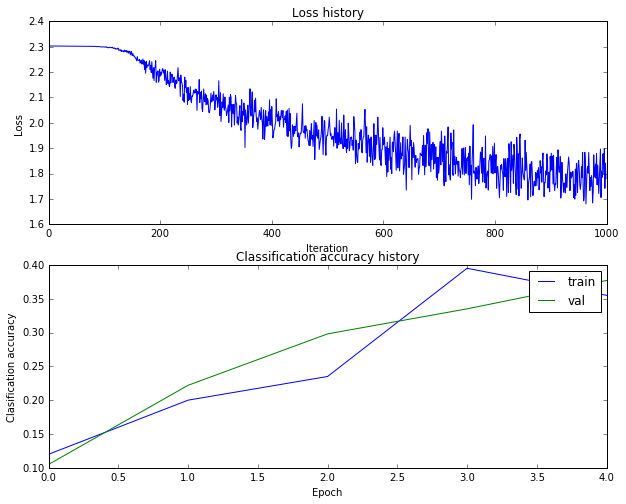

iteration 0 / 1000: loss 2.303187
iteration 100 / 1000: loss 2.299647
iteration 200 / 1000: loss 2.222912
iteration 300 / 1000: loss 2.146961
iteration 400 / 1000: loss 2.058170
iteration 500 / 1000: loss 1.977345
iteration 600 / 1000: loss 2.020736
iteration 700 / 1000: loss 1.994952
iteration 800 / 1000: loss 1.887433
iteration 900 / 1000: loss 1.858763
lr=0.000200 reg=0.500000 hidden_size=80.000000 lr_decay=0.800000
Training took 15s
Validation accuracy:  0.326


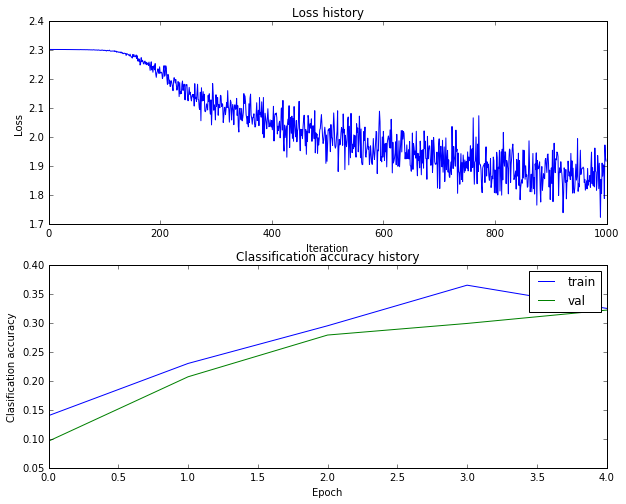

iteration 0 / 1000: loss 2.303201
iteration 100 / 1000: loss 2.298760
iteration 200 / 1000: loss 2.156299
iteration 300 / 1000: loss 2.027494
iteration 400 / 1000: loss 2.089048
iteration 500 / 1000: loss 1.923533
iteration 600 / 1000: loss 1.916011
iteration 700 / 1000: loss 1.849219
iteration 800 / 1000: loss 1.730304
iteration 900 / 1000: loss 1.758329
lr=0.000200 reg=0.500000 hidden_size=80.000000 lr_decay=0.900000
Training took 18s
Validation accuracy:  0.357


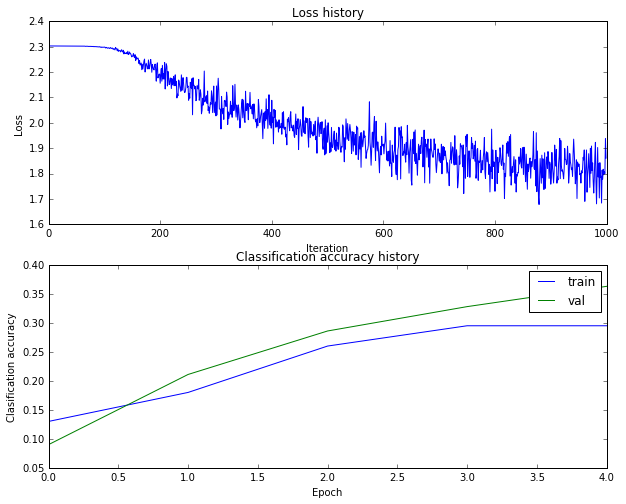

iteration 0 / 1000: loss 2.303220
iteration 100 / 1000: loss 2.295457
iteration 200 / 1000: loss 2.154307
iteration 300 / 1000: loss 1.993964
iteration 400 / 1000: loss 1.987711
iteration 500 / 1000: loss 1.935878
iteration 600 / 1000: loss 1.828087
iteration 700 / 1000: loss 1.832534
iteration 800 / 1000: loss 1.787211
iteration 900 / 1000: loss 1.807636
lr=0.000200 reg=0.500000 hidden_size=80.000000 lr_decay=0.950000
Training took 15s
Validation accuracy:  0.382


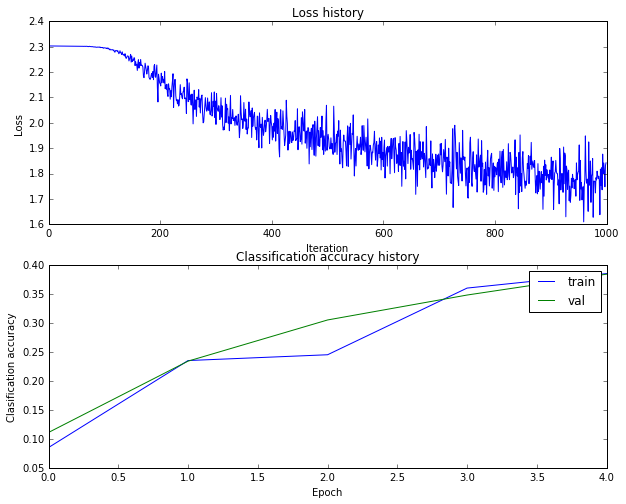

iteration 0 / 1000: loss 2.303511
iteration 100 / 1000: loss 2.296906
iteration 200 / 1000: loss 2.203799
iteration 300 / 1000: loss 2.183875
iteration 400 / 1000: loss 2.047948
iteration 500 / 1000: loss 1.995739
iteration 600 / 1000: loss 1.931990
iteration 700 / 1000: loss 1.875691
iteration 800 / 1000: loss 1.894127
iteration 900 / 1000: loss 1.768392
lr=0.000200 reg=0.500000 hidden_size=120.000000 lr_decay=0.800000
Training took 18s
Validation accuracy:  0.325


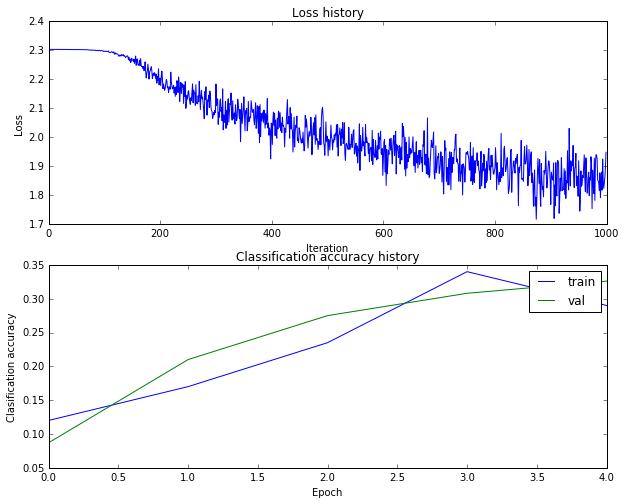

iteration 0 / 1000: loss 2.303487
iteration 100 / 1000: loss 2.297177
iteration 200 / 1000: loss 2.194291
iteration 300 / 1000: loss 2.141122
iteration 400 / 1000: loss 1.870001
iteration 500 / 1000: loss 1.926332
iteration 600 / 1000: loss 1.948749
iteration 700 / 1000: loss 1.937072
iteration 800 / 1000: loss 1.818293
iteration 900 / 1000: loss 1.796053
lr=0.000200 reg=0.500000 hidden_size=120.000000 lr_decay=0.900000
Training took 22s
Validation accuracy:  0.368


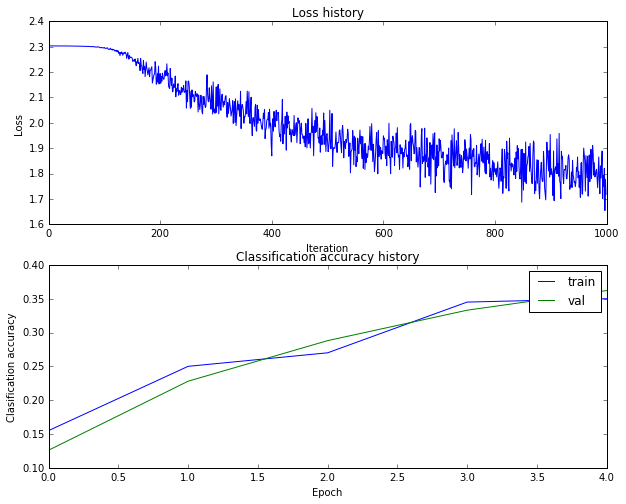

iteration 0 / 1000: loss 2.303513
iteration 100 / 1000: loss 2.293766
iteration 200 / 1000: loss 2.183430
iteration 300 / 1000: loss 2.083450
iteration 400 / 1000: loss 1.901344
iteration 500 / 1000: loss 1.866145
iteration 600 / 1000: loss 1.874650
iteration 700 / 1000: loss 1.802522
iteration 800 / 1000: loss 1.890888
iteration 900 / 1000: loss 1.677133
lr=0.000200 reg=0.500000 hidden_size=120.000000 lr_decay=0.950000
Training took 22s
Validation accuracy:  0.372


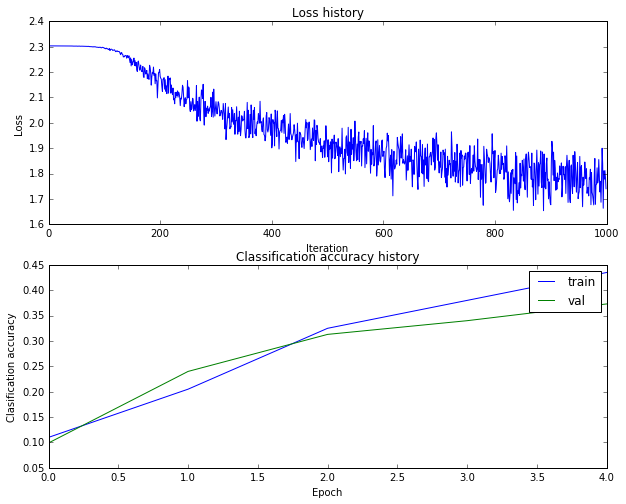

iteration 0 / 1000: loss 2.303844
iteration 100 / 1000: loss 2.295938
iteration 200 / 1000: loss 2.170140
iteration 300 / 1000: loss 2.075117
iteration 400 / 1000: loss 2.005085
iteration 500 / 1000: loss 2.009253
iteration 600 / 1000: loss 1.935208
iteration 700 / 1000: loss 1.960405
iteration 800 / 1000: loss 1.947936
iteration 900 / 1000: loss 1.914925
lr=0.000200 reg=0.500000 hidden_size=160.000000 lr_decay=0.800000
Training took 25s
Validation accuracy:  0.329


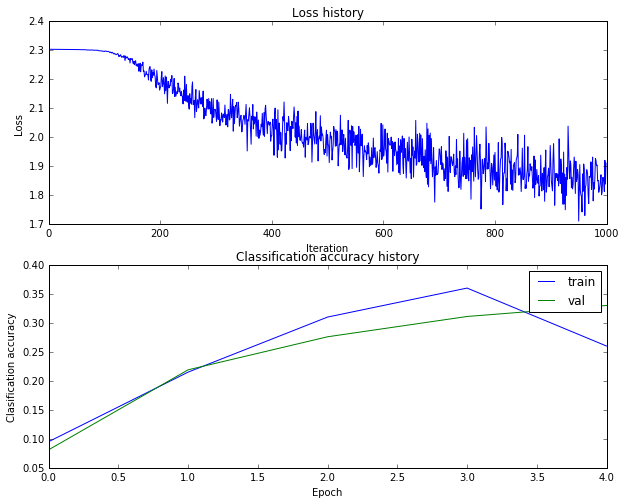

iteration 0 / 1000: loss 2.303848
iteration 100 / 1000: loss 2.295795
iteration 200 / 1000: loss 2.156562
iteration 300 / 1000: loss 2.019631
iteration 400 / 1000: loss 2.018017
iteration 500 / 1000: loss 1.910155
iteration 600 / 1000: loss 1.857623
iteration 700 / 1000: loss 1.842710
iteration 800 / 1000: loss 1.836626
iteration 900 / 1000: loss 1.790451
lr=0.000200 reg=0.500000 hidden_size=160.000000 lr_decay=0.900000
Training took 28s
Validation accuracy:  0.373


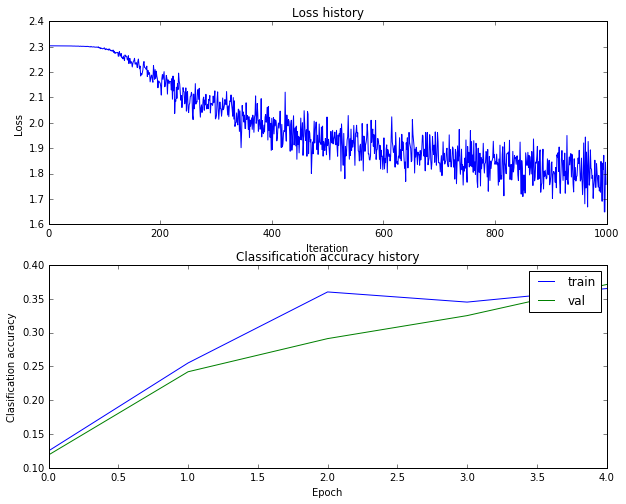

iteration 0 / 1000: loss 2.303842
iteration 100 / 1000: loss 2.289153
iteration 200 / 1000: loss 2.142287
iteration 300 / 1000: loss 2.056142
iteration 400 / 1000: loss 1.985943
iteration 500 / 1000: loss 1.871361
iteration 600 / 1000: loss 1.858823
iteration 700 / 1000: loss 1.819611
iteration 800 / 1000: loss 1.853325
iteration 900 / 1000: loss 1.737612
lr=0.000200 reg=0.500000 hidden_size=160.000000 lr_decay=0.950000
Training took 25s
Validation accuracy:  0.376


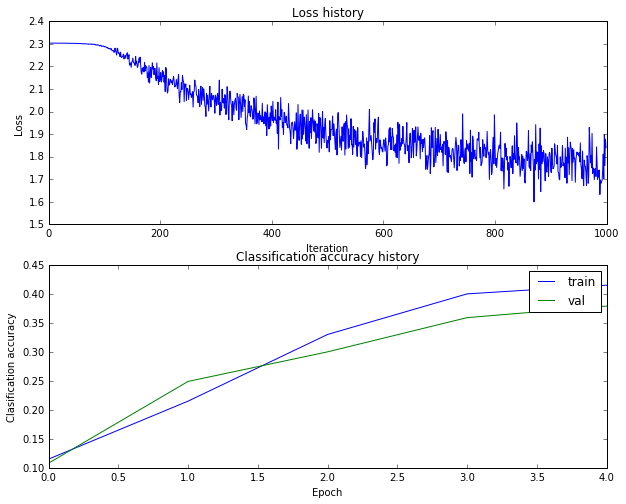

iteration 0 / 1000: loss 2.304920
iteration 100 / 1000: loss 2.302057
iteration 200 / 1000: loss 2.238450
iteration 300 / 1000: loss 2.123241
iteration 400 / 1000: loss 2.079917
iteration 500 / 1000: loss 2.125268
iteration 600 / 1000: loss 2.043307
iteration 700 / 1000: loss 2.004827
iteration 800 / 1000: loss 2.007649
iteration 900 / 1000: loss 1.961789
lr=0.000200 reg=3.000000 hidden_size=50.000000 lr_decay=0.800000
Training took 11s
Validation accuracy:  0.311


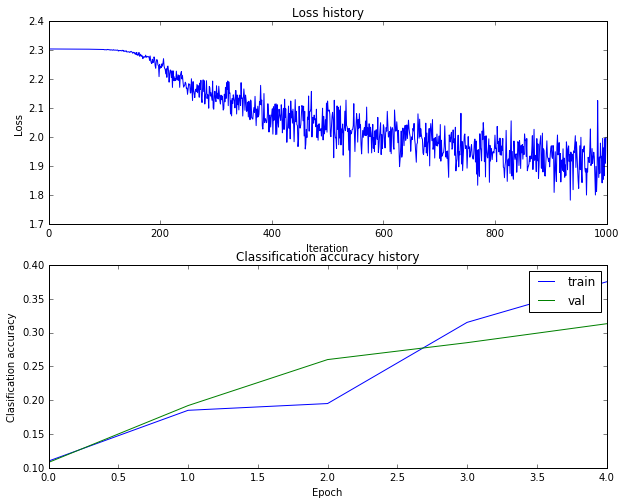

iteration 0 / 1000: loss 2.304909
iteration 100 / 1000: loss 2.301741
iteration 200 / 1000: loss 2.191644
iteration 300 / 1000: loss 2.147457
iteration 400 / 1000: loss 2.056108
iteration 500 / 1000: loss 1.954217
iteration 600 / 1000: loss 1.947751
iteration 700 / 1000: loss 1.889817
iteration 800 / 1000: loss 1.947883
iteration 900 / 1000: loss 1.901530
lr=0.000200 reg=3.000000 hidden_size=50.000000 lr_decay=0.900000
Training took 10s
Validation accuracy:  0.336


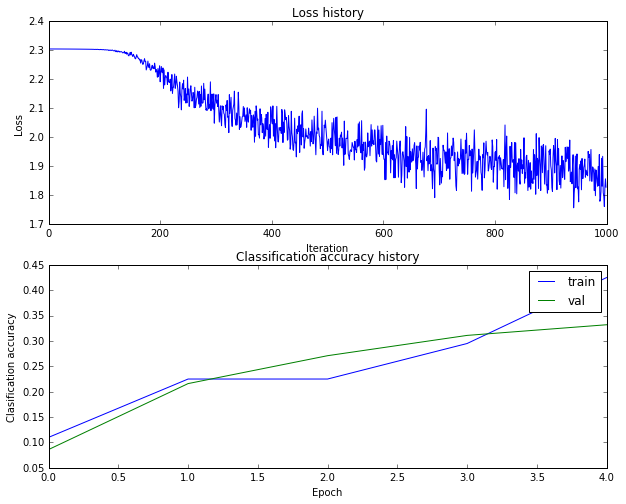

iteration 0 / 1000: loss 2.304913
iteration 100 / 1000: loss 2.301889
iteration 200 / 1000: loss 2.199605
iteration 300 / 1000: loss 2.070900
iteration 400 / 1000: loss 2.101409
iteration 500 / 1000: loss 2.020027
iteration 600 / 1000: loss 1.928611
iteration 700 / 1000: loss 1.964568
iteration 800 / 1000: loss 1.857205
iteration 900 / 1000: loss 1.857690
lr=0.000200 reg=3.000000 hidden_size=50.000000 lr_decay=0.950000
Training took 10s
Validation accuracy:  0.359


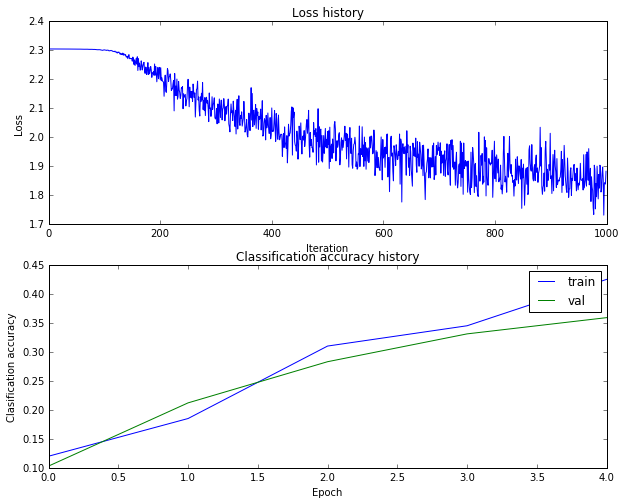

iteration 0 / 1000: loss 2.306299
iteration 100 / 1000: loss 2.304200
iteration 200 / 1000: loss 2.243286
iteration 300 / 1000: loss 2.111127
iteration 400 / 1000: loss 2.063252
iteration 500 / 1000: loss 2.051143
iteration 600 / 1000: loss 2.086212
iteration 700 / 1000: loss 1.936760
iteration 800 / 1000: loss 1.942035
iteration 900 / 1000: loss 1.957436
lr=0.000200 reg=3.000000 hidden_size=80.000000 lr_decay=0.800000
Training took 15s
Validation accuracy:  0.311


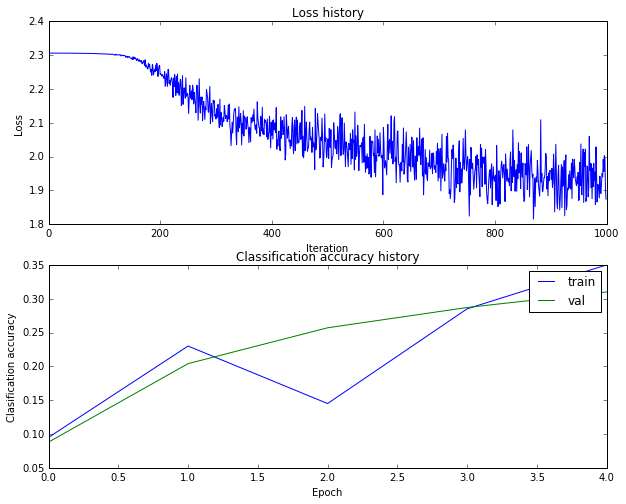

iteration 0 / 1000: loss 2.306308
iteration 100 / 1000: loss 2.299563
iteration 200 / 1000: loss 2.207276
iteration 300 / 1000: loss 2.134894
iteration 400 / 1000: loss 2.008791
iteration 500 / 1000: loss 1.952421
iteration 600 / 1000: loss 2.085627
iteration 700 / 1000: loss 1.890429
iteration 800 / 1000: loss 1.897869
iteration 900 / 1000: loss 1.897661
lr=0.000200 reg=3.000000 hidden_size=80.000000 lr_decay=0.900000
Training took 13s
Validation accuracy:  0.358


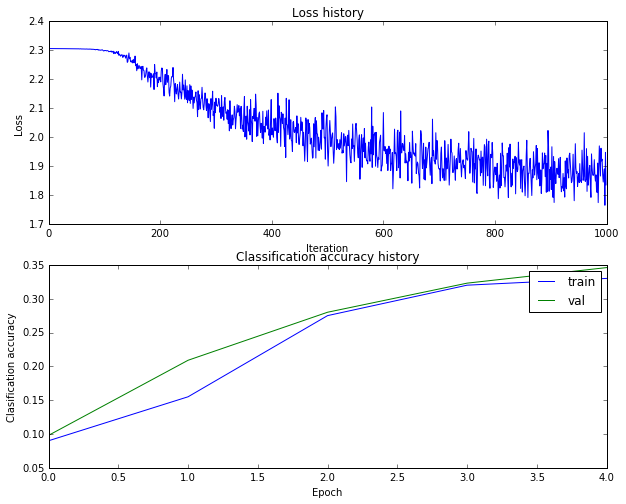

iteration 0 / 1000: loss 2.306298
iteration 100 / 1000: loss 2.301243
iteration 200 / 1000: loss 2.157054
iteration 300 / 1000: loss 2.047963
iteration 400 / 1000: loss 2.013081
iteration 500 / 1000: loss 2.053385
iteration 600 / 1000: loss 1.946308
iteration 700 / 1000: loss 1.897487
iteration 800 / 1000: loss 1.921368
iteration 900 / 1000: loss 1.885669
lr=0.000200 reg=3.000000 hidden_size=80.000000 lr_decay=0.950000
Training took 13s
Validation accuracy:  0.371


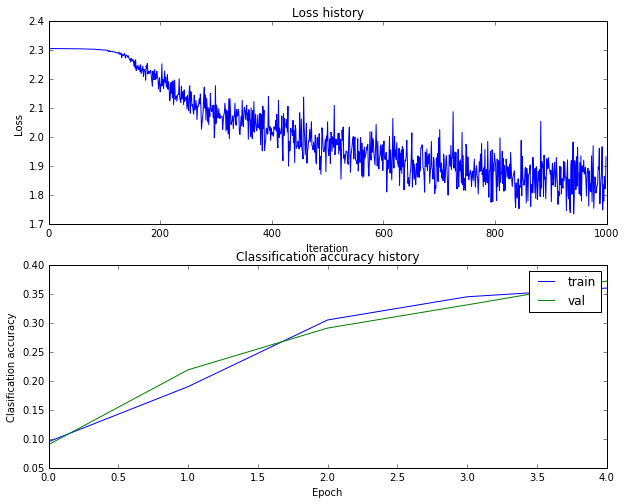

iteration 0 / 1000: loss 2.308175
iteration 100 / 1000: loss 2.301444
iteration 200 / 1000: loss 2.225131
iteration 300 / 1000: loss 2.101777
iteration 400 / 1000: loss 2.031623
iteration 500 / 1000: loss 2.006304
iteration 600 / 1000: loss 1.987652
iteration 700 / 1000: loss 1.971996
iteration 800 / 1000: loss 1.980999
iteration 900 / 1000: loss 1.957652
lr=0.000200 reg=3.000000 hidden_size=120.000000 lr_decay=0.800000
Training took 19s
Validation accuracy:  0.326


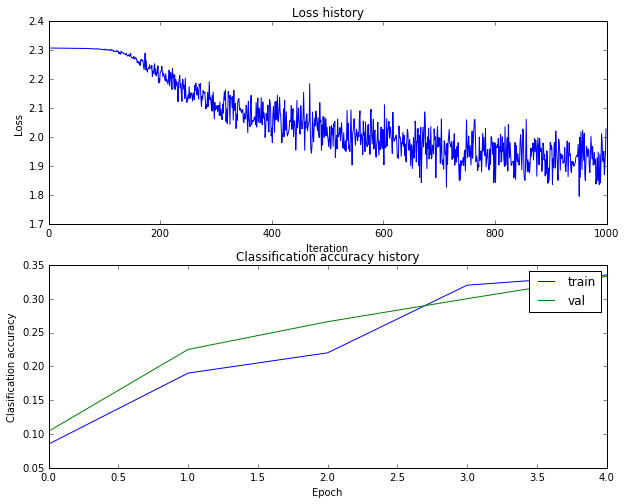

iteration 0 / 1000: loss 2.308176
iteration 100 / 1000: loss 2.300662
iteration 200 / 1000: loss 2.211585
iteration 300 / 1000: loss 2.044552
iteration 400 / 1000: loss 2.029113
iteration 500 / 1000: loss 1.985422
iteration 600 / 1000: loss 1.998212
iteration 700 / 1000: loss 1.924666
iteration 800 / 1000: loss 1.838386
iteration 900 / 1000: loss 1.850340
lr=0.000200 reg=3.000000 hidden_size=120.000000 lr_decay=0.900000
Training took 20s
Validation accuracy:  0.35


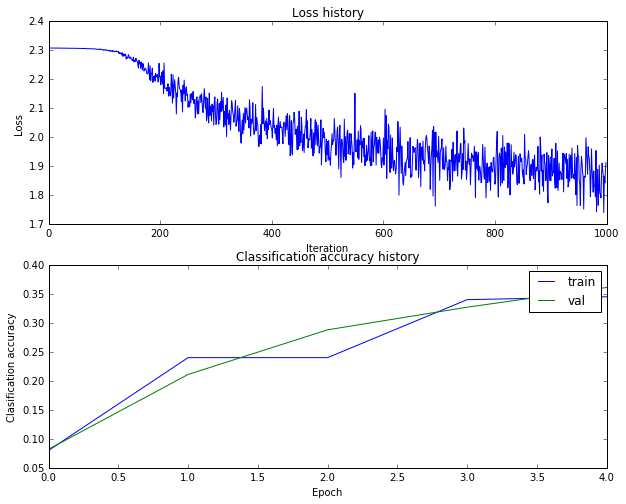

iteration 0 / 1000: loss 2.308116
iteration 100 / 1000: loss 2.300453
iteration 200 / 1000: loss 2.194239
iteration 300 / 1000: loss 2.095407
iteration 400 / 1000: loss 2.026024
iteration 500 / 1000: loss 2.024533
iteration 600 / 1000: loss 2.004501
iteration 700 / 1000: loss 1.837031
iteration 800 / 1000: loss 1.919629
iteration 900 / 1000: loss 1.767981
lr=0.000200 reg=3.000000 hidden_size=120.000000 lr_decay=0.950000
Training took 25s
Validation accuracy:  0.377


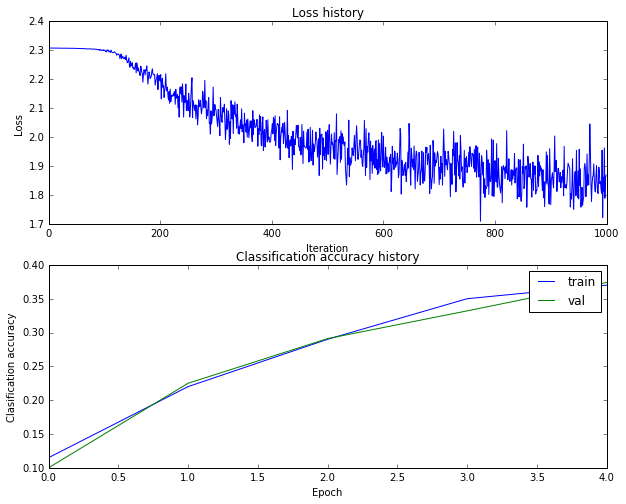

iteration 0 / 1000: loss 2.310009
iteration 100 / 1000: loss 2.303214
iteration 200 / 1000: loss 2.220766
iteration 300 / 1000: loss 2.097977
iteration 400 / 1000: loss 2.072799
iteration 500 / 1000: loss 2.051876
iteration 600 / 1000: loss 1.992909
iteration 700 / 1000: loss 1.997311
iteration 800 / 1000: loss 1.870920
iteration 900 / 1000: loss 1.968243
lr=0.000200 reg=3.000000 hidden_size=160.000000 lr_decay=0.800000
Training took 28s
Validation accuracy:  0.329


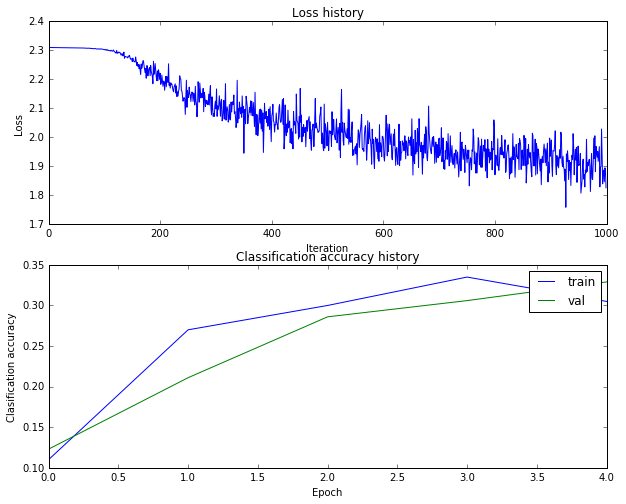

iteration 0 / 1000: loss 2.309959
iteration 100 / 1000: loss 2.291362
iteration 200 / 1000: loss 2.186750
iteration 300 / 1000: loss 2.074726
iteration 400 / 1000: loss 1.971202
iteration 500 / 1000: loss 2.015665
iteration 600 / 1000: loss 1.891695
iteration 700 / 1000: loss 1.932659
iteration 800 / 1000: loss 1.897158
iteration 900 / 1000: loss 1.893125
lr=0.000200 reg=3.000000 hidden_size=160.000000 lr_decay=0.900000
Training took 25s
Validation accuracy:  0.358


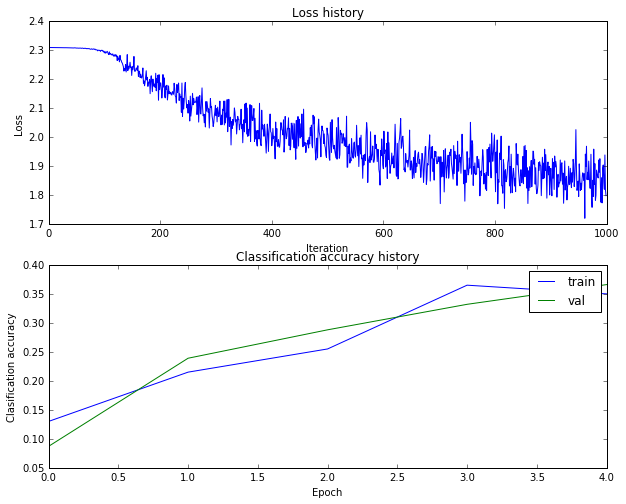

iteration 0 / 1000: loss 2.309979
iteration 100 / 1000: loss 2.295864
iteration 200 / 1000: loss 2.182063
iteration 300 / 1000: loss 2.036505
iteration 400 / 1000: loss 2.050448
iteration 500 / 1000: loss 1.982691
iteration 600 / 1000: loss 1.933271
iteration 700 / 1000: loss 1.848116
iteration 800 / 1000: loss 1.798573
iteration 900 / 1000: loss 1.846787
lr=0.000200 reg=3.000000 hidden_size=160.000000 lr_decay=0.950000
Training took 27s
Validation accuracy:  0.377


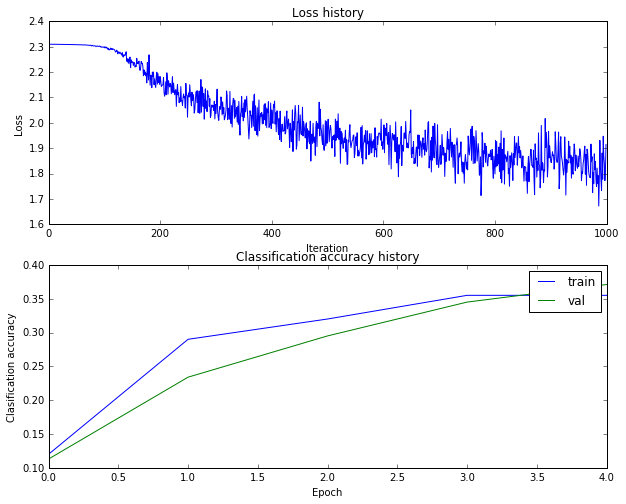

iteration 0 / 1000: loss 2.302963
iteration 100 / 1000: loss 2.166089
iteration 200 / 1000: loss 1.910554
iteration 300 / 1000: loss 1.879973
iteration 400 / 1000: loss 1.782213
iteration 500 / 1000: loss 1.732229
iteration 600 / 1000: loss 1.751440
iteration 700 / 1000: loss 1.754584
iteration 800 / 1000: loss 1.788559
iteration 900 / 1000: loss 1.662408
lr=0.000500 reg=0.500000 hidden_size=50.000000 lr_decay=0.800000
Training took 12s
Validation accuracy:  0.424


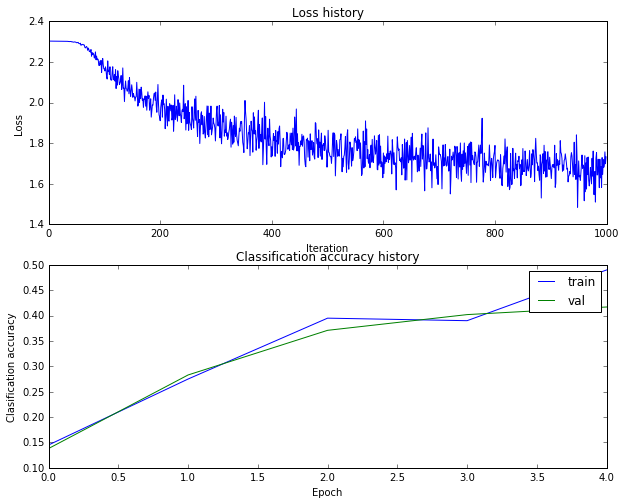

iteration 0 / 1000: loss 2.302969
iteration 100 / 1000: loss 2.127049
iteration 200 / 1000: loss 1.942774
iteration 300 / 1000: loss 1.941179
iteration 400 / 1000: loss 1.721714
iteration 500 / 1000: loss 1.720166
iteration 600 / 1000: loss 1.723302
iteration 700 / 1000: loss 1.584034
iteration 800 / 1000: loss 1.733498
iteration 900 / 1000: loss 1.701617
lr=0.000500 reg=0.500000 hidden_size=50.000000 lr_decay=0.900000
Training took 11s
Validation accuracy:  0.459


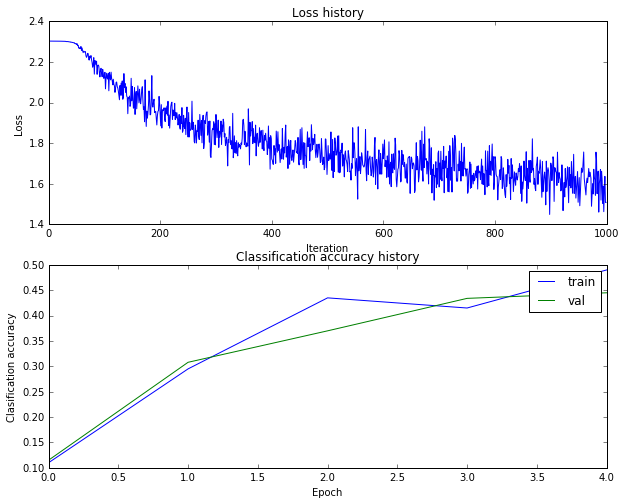

iteration 0 / 1000: loss 2.302959
iteration 100 / 1000: loss 2.076743
iteration 200 / 1000: loss 1.981259
iteration 300 / 1000: loss 1.836417
iteration 400 / 1000: loss 1.769324
iteration 500 / 1000: loss 1.834680
iteration 600 / 1000: loss 1.783226
iteration 700 / 1000: loss 1.632232
iteration 800 / 1000: loss 1.681082
iteration 900 / 1000: loss 1.687294
lr=0.000500 reg=0.500000 hidden_size=50.000000 lr_decay=0.950000
Training took 12s
Validation accuracy:  0.452


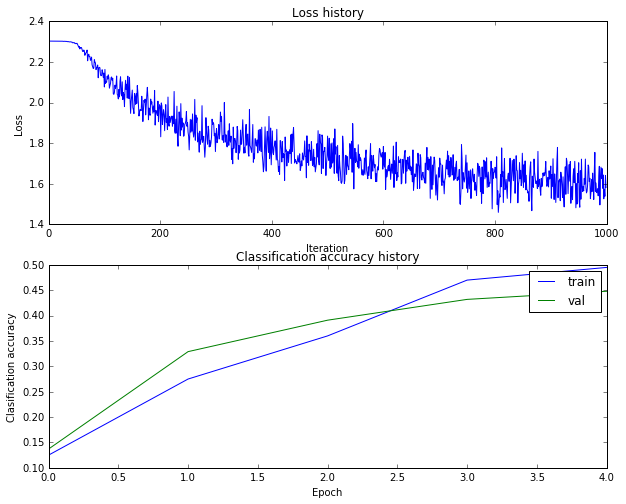

iteration 0 / 1000: loss 2.303205
iteration 100 / 1000: loss 2.193150
iteration 200 / 1000: loss 2.008278
iteration 300 / 1000: loss 1.910524
iteration 400 / 1000: loss 1.912151
iteration 500 / 1000: loss 1.831116
iteration 600 / 1000: loss 1.801725
iteration 700 / 1000: loss 1.778155
iteration 800 / 1000: loss 1.679650
iteration 900 / 1000: loss 1.745107
lr=0.000500 reg=0.500000 hidden_size=80.000000 lr_decay=0.800000
Training took 16s
Validation accuracy:  0.432


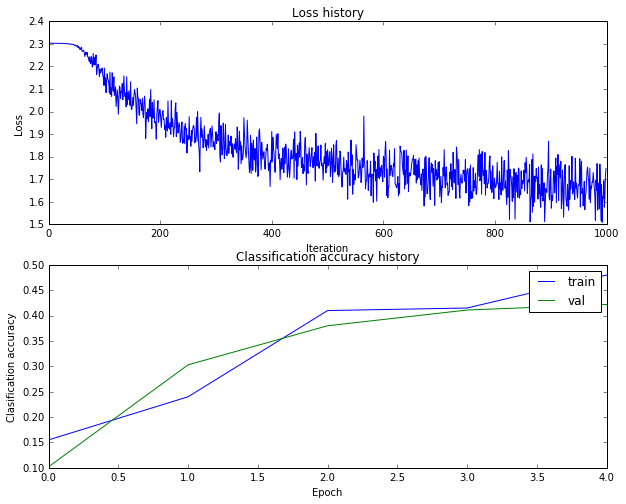

iteration 0 / 1000: loss 2.303185
iteration 100 / 1000: loss 2.162418
iteration 200 / 1000: loss 1.967497
iteration 300 / 1000: loss 1.771208
iteration 400 / 1000: loss 1.826372
iteration 500 / 1000: loss 1.700823
iteration 600 / 1000: loss 1.645994
iteration 700 / 1000: loss 1.594617
iteration 800 / 1000: loss 1.683909
iteration 900 / 1000: loss 1.542927
lr=0.000500 reg=0.500000 hidden_size=80.000000 lr_decay=0.900000
Training took 14s
Validation accuracy:  0.436


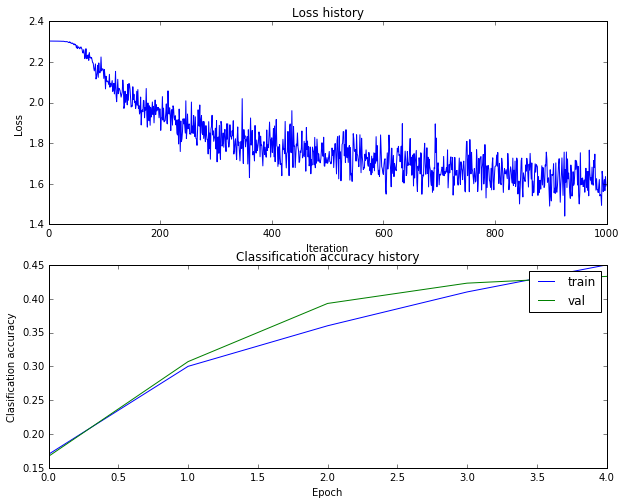

iteration 0 / 1000: loss 2.303194
iteration 100 / 1000: loss 2.096729
iteration 200 / 1000: loss 1.908994
iteration 300 / 1000: loss 1.853225
iteration 400 / 1000: loss 1.706619
iteration 500 / 1000: loss 1.756351
iteration 600 / 1000: loss 1.585576
iteration 700 / 1000: loss 1.672365
iteration 800 / 1000: loss 1.717037
iteration 900 / 1000: loss 1.494891
lr=0.000500 reg=0.500000 hidden_size=80.000000 lr_decay=0.950000
Training took 18s
Validation accuracy:  0.439


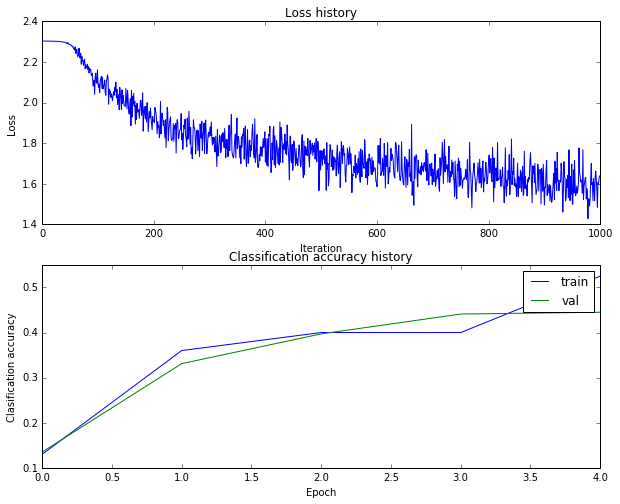

iteration 0 / 1000: loss 2.303536
iteration 100 / 1000: loss 2.143943
iteration 200 / 1000: loss 1.958751
iteration 300 / 1000: loss 1.916251
iteration 400 / 1000: loss 1.845733
iteration 500 / 1000: loss 1.762644
iteration 600 / 1000: loss 1.682377
iteration 700 / 1000: loss 1.716726
iteration 800 / 1000: loss 1.587394
iteration 900 / 1000: loss 1.780086
lr=0.000500 reg=0.500000 hidden_size=120.000000 lr_decay=0.800000
Training took 20s
Validation accuracy:  0.432


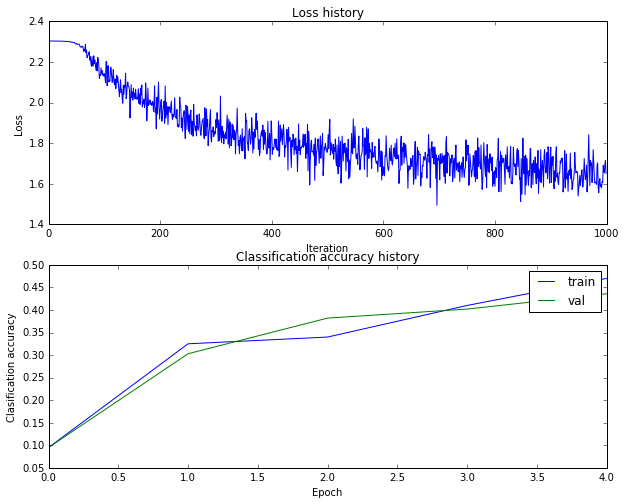

iteration 0 / 1000: loss 2.303519
iteration 100 / 1000: loss 2.036384
iteration 200 / 1000: loss 1.927972
iteration 300 / 1000: loss 1.718537
iteration 400 / 1000: loss 1.796858
iteration 500 / 1000: loss 1.703353
iteration 600 / 1000: loss 1.600868
iteration 700 / 1000: loss 1.646687
iteration 800 / 1000: loss 1.550233
iteration 900 / 1000: loss 1.684354
lr=0.000500 reg=0.500000 hidden_size=120.000000 lr_decay=0.900000
Training took 19s
Validation accuracy:  0.446


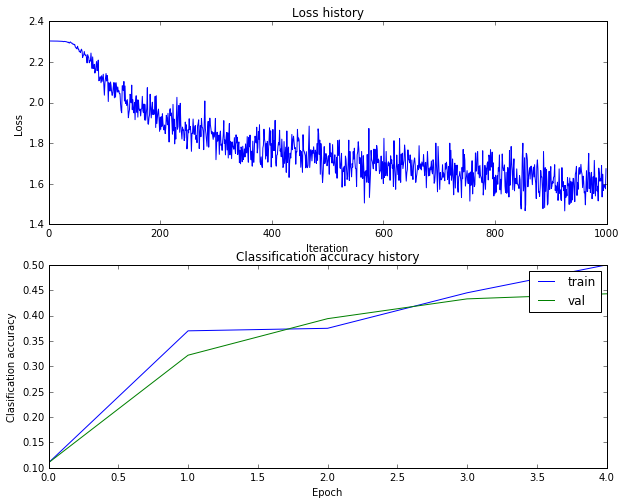

iteration 0 / 1000: loss 2.303479
iteration 100 / 1000: loss 2.110168
iteration 200 / 1000: loss 1.934261
iteration 300 / 1000: loss 1.949532
iteration 400 / 1000: loss 1.749576
iteration 500 / 1000: loss 1.664600
iteration 600 / 1000: loss 1.611996
iteration 700 / 1000: loss 1.750952
iteration 800 / 1000: loss 1.666414
iteration 900 / 1000: loss 1.664752
lr=0.000500 reg=0.500000 hidden_size=120.000000 lr_decay=0.950000
Training took 19s
Validation accuracy:  0.457


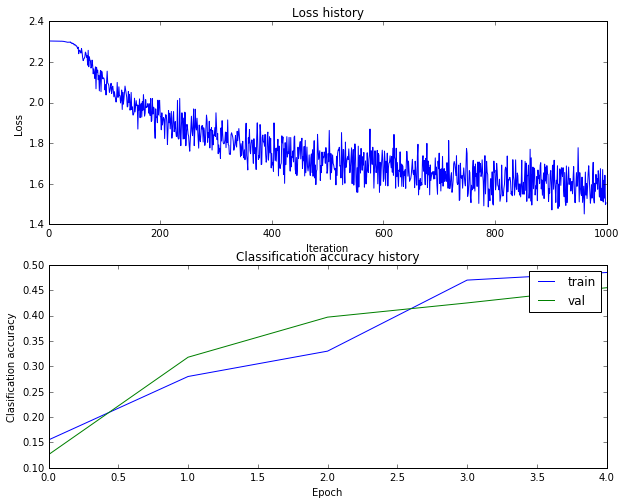

iteration 0 / 1000: loss 2.303850
iteration 100 / 1000: loss 2.124253
iteration 200 / 1000: loss 1.865549
iteration 300 / 1000: loss 1.846691
iteration 400 / 1000: loss 1.748225
iteration 500 / 1000: loss 1.774736
iteration 600 / 1000: loss 1.824310
iteration 700 / 1000: loss 1.535822
iteration 800 / 1000: loss 1.649293
iteration 900 / 1000: loss 1.656476
lr=0.000500 reg=0.500000 hidden_size=160.000000 lr_decay=0.800000
Training took 23s
Validation accuracy:  0.433


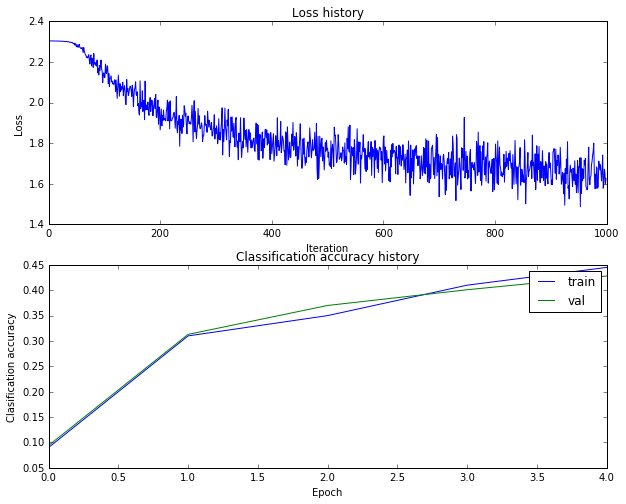

iteration 0 / 1000: loss 2.303821
iteration 100 / 1000: loss 2.131810
iteration 200 / 1000: loss 1.953952
iteration 300 / 1000: loss 1.733675
iteration 400 / 1000: loss 1.859893
iteration 500 / 1000: loss 1.783311
iteration 600 / 1000: loss 1.603143
iteration 700 / 1000: loss 1.672124
iteration 800 / 1000: loss 1.558914
iteration 900 / 1000: loss 1.607353
lr=0.000500 reg=0.500000 hidden_size=160.000000 lr_decay=0.900000
Training took 26s
Validation accuracy:  0.453


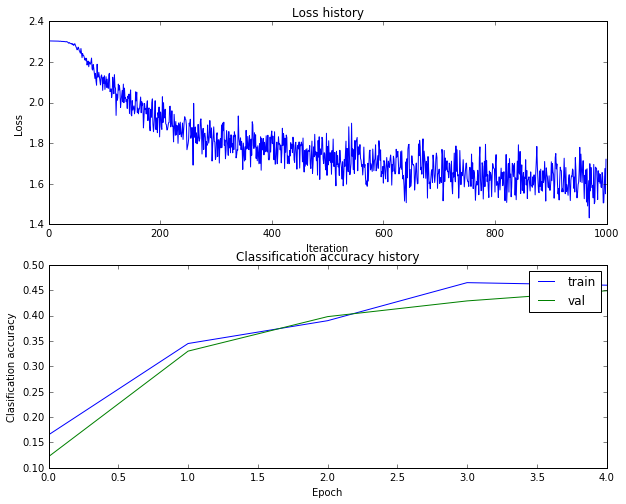

iteration 0 / 1000: loss 2.303818
iteration 100 / 1000: loss 2.109512
iteration 200 / 1000: loss 1.929326
iteration 300 / 1000: loss 1.895045
iteration 400 / 1000: loss 1.849436
iteration 500 / 1000: loss 1.706679
iteration 600 / 1000: loss 1.644188
iteration 700 / 1000: loss 1.683490
iteration 800 / 1000: loss 1.629063
iteration 900 / 1000: loss 1.429277
lr=0.000500 reg=0.500000 hidden_size=160.000000 lr_decay=0.950000
Training took 26s
Validation accuracy:  0.453


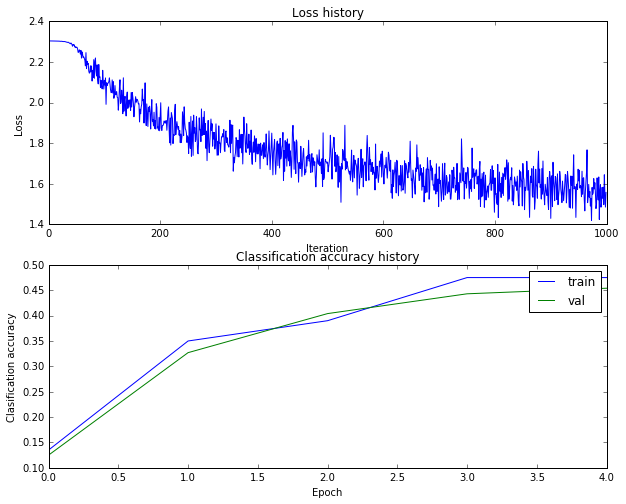

iteration 0 / 1000: loss 2.304881
iteration 100 / 1000: loss 2.199591
iteration 200 / 1000: loss 2.016454
iteration 300 / 1000: loss 1.885650
iteration 400 / 1000: loss 1.803083
iteration 500 / 1000: loss 1.818846
iteration 600 / 1000: loss 1.844615
iteration 700 / 1000: loss 1.736031
iteration 800 / 1000: loss 1.821804
iteration 900 / 1000: loss 1.623069
lr=0.000500 reg=3.000000 hidden_size=50.000000 lr_decay=0.800000
Training took 10s
Validation accuracy:  0.394


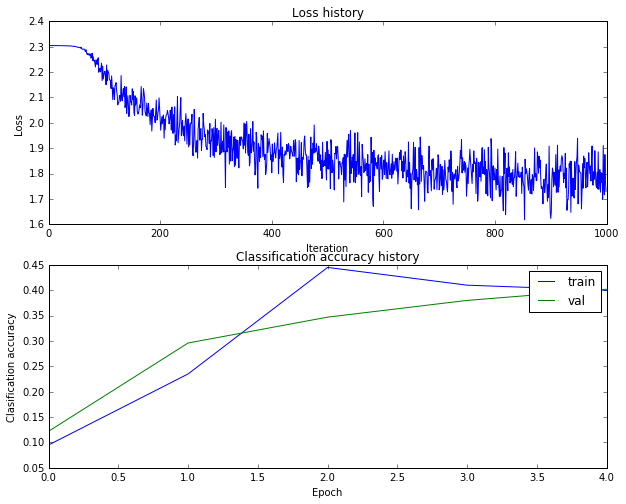

iteration 0 / 1000: loss 2.304909
iteration 100 / 1000: loss 2.108331
iteration 200 / 1000: loss 2.001926
iteration 300 / 1000: loss 1.858609
iteration 400 / 1000: loss 1.852137
iteration 500 / 1000: loss 1.781771
iteration 600 / 1000: loss 1.808967
iteration 700 / 1000: loss 1.812784
iteration 800 / 1000: loss 1.842054
iteration 900 / 1000: loss 1.734244
lr=0.000500 reg=3.000000 hidden_size=50.000000 lr_decay=0.900000
Training took 7s
Validation accuracy:  0.417


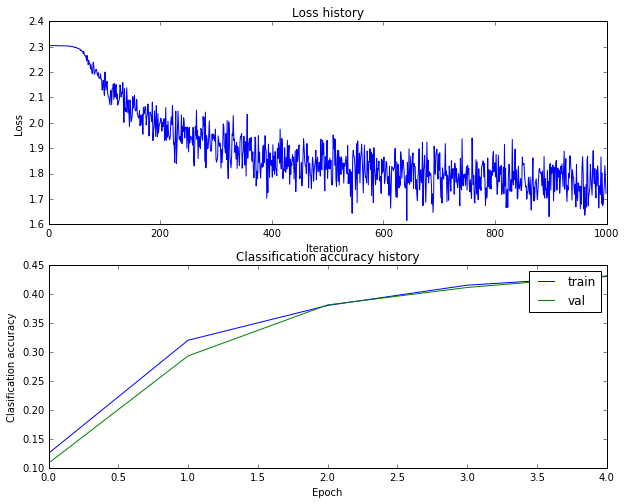

iteration 0 / 1000: loss 2.304888
iteration 100 / 1000: loss 2.126883
iteration 200 / 1000: loss 1.929423
iteration 300 / 1000: loss 1.905998
iteration 400 / 1000: loss 1.750763
iteration 500 / 1000: loss 1.816776
iteration 600 / 1000: loss 1.870765
iteration 700 / 1000: loss 1.759331
iteration 800 / 1000: loss 1.703845
iteration 900 / 1000: loss 1.845947
lr=0.000500 reg=3.000000 hidden_size=50.000000 lr_decay=0.950000
Training took 11s
Validation accuracy:  0.429


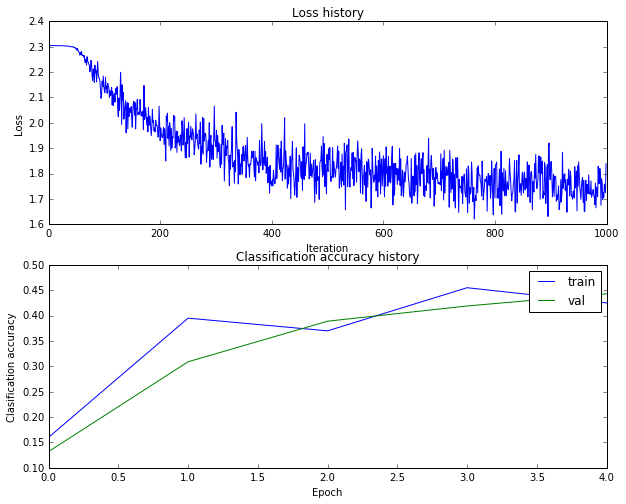

iteration 0 / 1000: loss 2.306261
iteration 100 / 1000: loss 2.173929
iteration 200 / 1000: loss 2.044773
iteration 300 / 1000: loss 1.947459
iteration 400 / 1000: loss 1.847696
iteration 500 / 1000: loss 1.807080
iteration 600 / 1000: loss 1.776971
iteration 700 / 1000: loss 1.795992
iteration 800 / 1000: loss 1.800948
iteration 900 / 1000: loss 1.723932
lr=0.000500 reg=3.000000 hidden_size=80.000000 lr_decay=0.800000
Training took 17s
Validation accuracy:  0.417


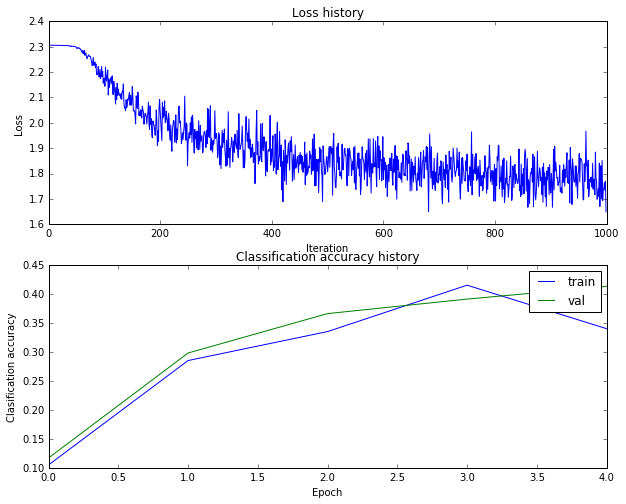

iteration 0 / 1000: loss 2.306291
iteration 100 / 1000: loss 2.150156
iteration 200 / 1000: loss 2.053484
iteration 300 / 1000: loss 1.961659
iteration 400 / 1000: loss 1.895479
iteration 500 / 1000: loss 1.801748
iteration 600 / 1000: loss 1.831794
iteration 700 / 1000: loss 1.767945
iteration 800 / 1000: loss 1.849486
iteration 900 / 1000: loss 1.700042
lr=0.000500 reg=3.000000 hidden_size=80.000000 lr_decay=0.900000
Training took 14s
Validation accuracy:  0.438


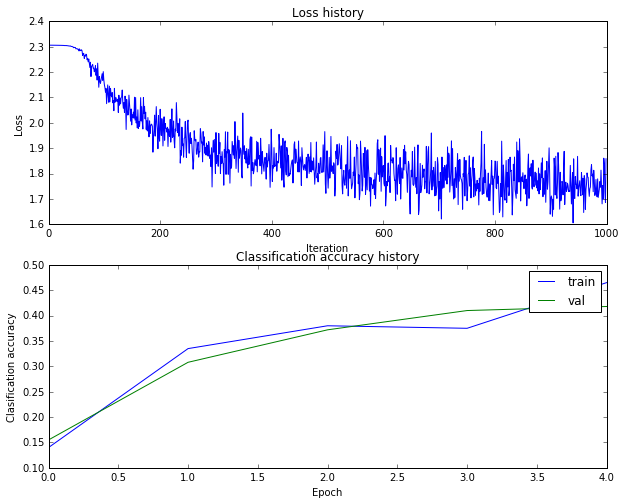

iteration 0 / 1000: loss 2.306279
iteration 100 / 1000: loss 2.142729
iteration 200 / 1000: loss 1.904682
iteration 300 / 1000: loss 1.907314
iteration 400 / 1000: loss 1.881157
iteration 500 / 1000: loss 1.871026
iteration 600 / 1000: loss 1.668522
iteration 700 / 1000: loss 1.806498
iteration 800 / 1000: loss 1.785253
iteration 900 / 1000: loss 1.829576
lr=0.000500 reg=3.000000 hidden_size=80.000000 lr_decay=0.950000
Training took 14s
Validation accuracy:  0.448


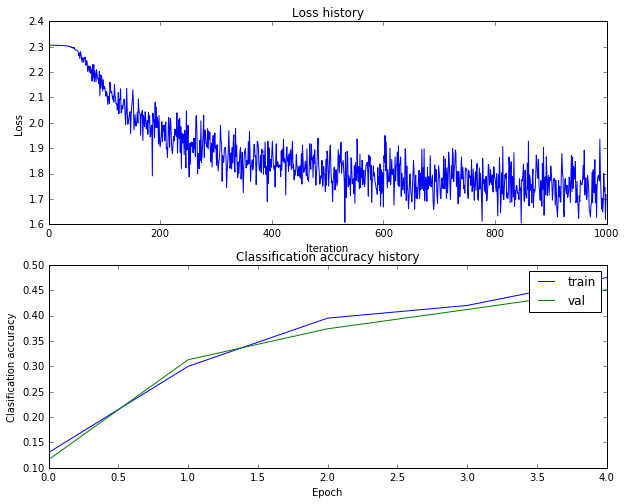

iteration 0 / 1000: loss 2.308194
iteration 100 / 1000: loss 2.189003
iteration 200 / 1000: loss 1.957752
iteration 300 / 1000: loss 1.957681
iteration 400 / 1000: loss 1.937365
iteration 500 / 1000: loss 1.908508
iteration 600 / 1000: loss 1.847142
iteration 700 / 1000: loss 1.703523
iteration 800 / 1000: loss 1.745878
iteration 900 / 1000: loss 1.759112
lr=0.000500 reg=3.000000 hidden_size=120.000000 lr_decay=0.800000
Training took 20s
Validation accuracy:  0.423


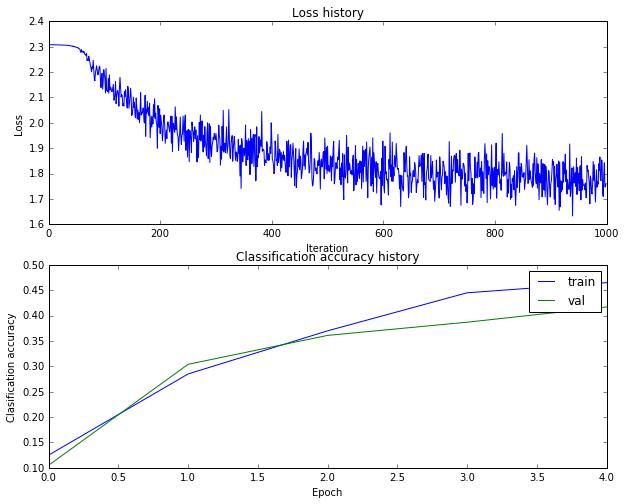

iteration 0 / 1000: loss 2.308096
iteration 100 / 1000: loss 2.162935
iteration 200 / 1000: loss 2.055407
iteration 300 / 1000: loss 1.914579
iteration 400 / 1000: loss 1.945639
iteration 500 / 1000: loss 1.842612
iteration 600 / 1000: loss 1.899207
iteration 700 / 1000: loss 1.822492
iteration 800 / 1000: loss 1.643330
iteration 900 / 1000: loss 1.759308
lr=0.000500 reg=3.000000 hidden_size=120.000000 lr_decay=0.900000
Training took 20s
Validation accuracy:  0.433


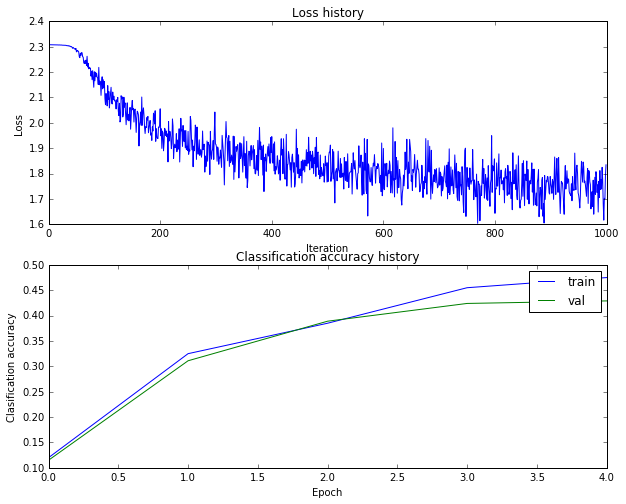

iteration 0 / 1000: loss 2.308120
iteration 100 / 1000: loss 2.098456
iteration 200 / 1000: loss 1.969843
iteration 300 / 1000: loss 1.902505
iteration 400 / 1000: loss 1.787216
iteration 500 / 1000: loss 1.815559
iteration 600 / 1000: loss 1.688345
iteration 700 / 1000: loss 1.790519
iteration 800 / 1000: loss 1.799738
iteration 900 / 1000: loss 1.705284
lr=0.000500 reg=3.000000 hidden_size=120.000000 lr_decay=0.950000
Training took 21s
Validation accuracy:  0.438


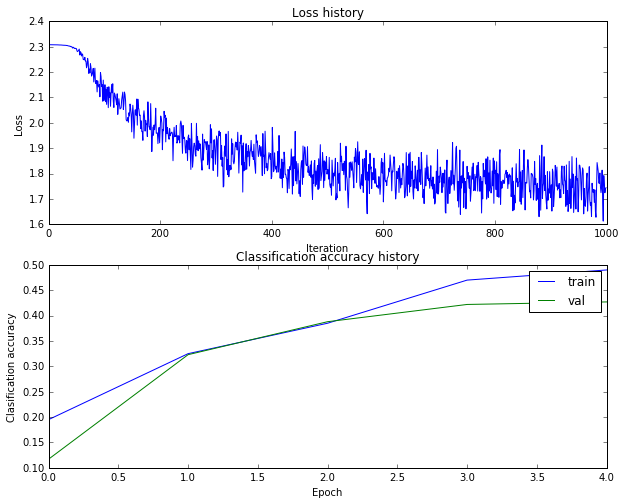

iteration 0 / 1000: loss 2.309982
iteration 100 / 1000: loss 2.108651
iteration 200 / 1000: loss 2.048788
iteration 300 / 1000: loss 1.918219
iteration 400 / 1000: loss 1.841500
iteration 500 / 1000: loss 1.778166
iteration 600 / 1000: loss 1.958481
iteration 700 / 1000: loss 1.816914
iteration 800 / 1000: loss 1.796214
iteration 900 / 1000: loss 1.808585
lr=0.000500 reg=3.000000 hidden_size=160.000000 lr_decay=0.800000
Training took 28s
Validation accuracy:  0.418


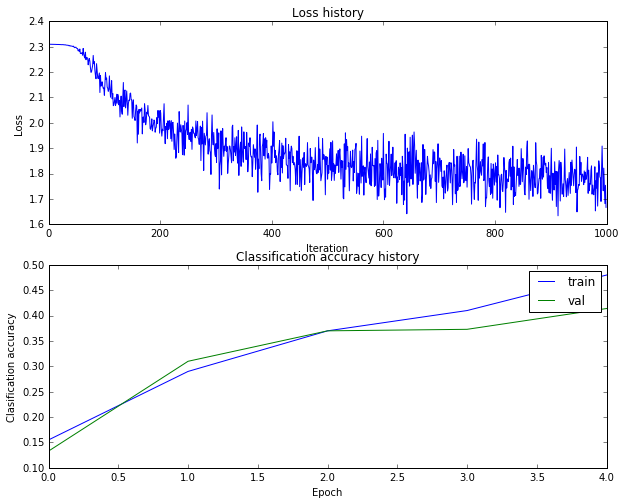

iteration 0 / 1000: loss 2.309949
iteration 100 / 1000: loss 2.087501
iteration 200 / 1000: loss 1.953199
iteration 300 / 1000: loss 1.928397
iteration 400 / 1000: loss 1.832909
iteration 500 / 1000: loss 1.826128
iteration 600 / 1000: loss 1.699449
iteration 700 / 1000: loss 1.714864
iteration 800 / 1000: loss 1.831912
iteration 900 / 1000: loss 1.711822
lr=0.000500 reg=3.000000 hidden_size=160.000000 lr_decay=0.900000
Training took 27s
Validation accuracy:  0.439


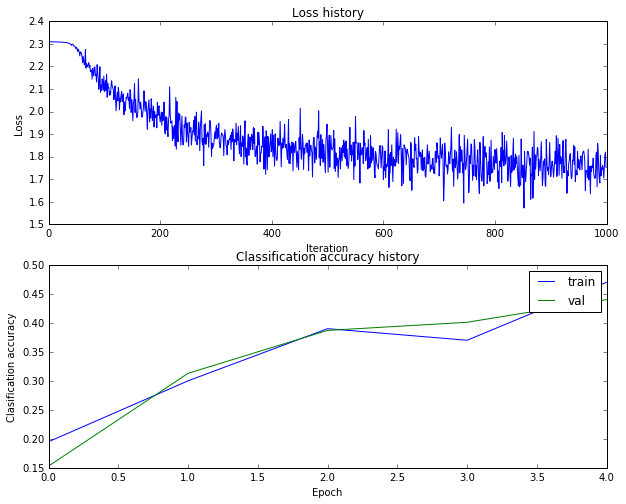

iteration 0 / 1000: loss 2.310008
iteration 100 / 1000: loss 2.144265
iteration 200 / 1000: loss 2.054407
iteration 300 / 1000: loss 1.790880
iteration 400 / 1000: loss 1.894345
iteration 500 / 1000: loss 1.875776
iteration 600 / 1000: loss 1.710908
iteration 700 / 1000: loss 1.753011
iteration 800 / 1000: loss 1.724324
iteration 900 / 1000: loss 1.848983
lr=0.000500 reg=3.000000 hidden_size=160.000000 lr_decay=0.950000
Training took 24s
Validation accuracy:  0.437


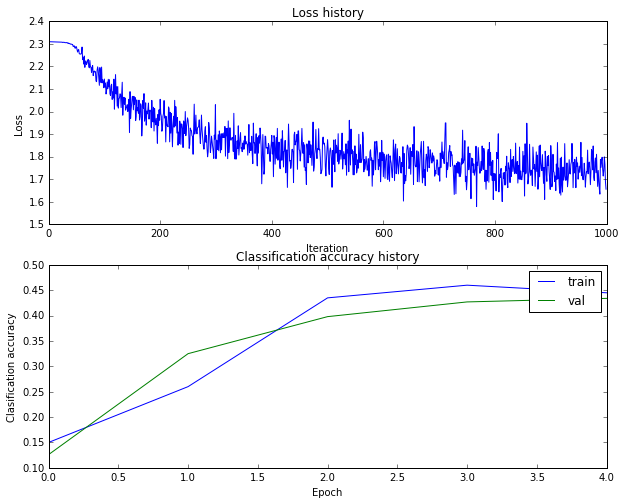

In [70]:
import time
import itertools

best_net = None # store the best model into this 

#################################################################################
# DONE: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_val_acc = 0
lrs = [2e-4, 5e-4]
regs = [0.5, 3]
hidden_sizes = [50, 80, 120, 160]
lr_decays = [0.8, 0.9, 0.95]
training_results = {}  # (lr, reg, hs, lr_decay) => (train_acc, val_acc)
for lr, reg, hidden_size, lr_decay in itertools.product(lrs, regs, hidden_sizes, lr_decays):
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    start = time.time()
    stats = net.train(X_train, y_train, X_val, y_val,
                      num_iters=1000, batch_size=200,
                      learning_rate=lr, learning_rate_decay=lr_decay,
                      reg=reg, verbose=True)
    end = time.time()
    print 'lr=%f reg=%f hidden_size=%d lr_decay=%f' % (lr, reg, hidden_size, lr_decay)
    print 'Training took %ds' % (end - start)
    val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ', val_acc
    train_acc = (net.predict(X_train) == y_train).mean()
    training_results[(lr, reg, hidden_size, lr_decay)] = (train_acc, val_acc)
    plot_stats(stats)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_net = net
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [1]:
print training_results
print 'lr\t\treg\t\thidden\tlr_decay\t\ttrain_acc\tval_acc'
for (lr, reg, hs, lr_decay), (train_acc, val_acc) in sorted(training_results.iteritems()):
    print '%f\t%f\t%d\t%f\t%f\t%f' % (lr, reg, hs, lr_decay, train_acc, val_acc)

NameError: name 'training_results' is not defined

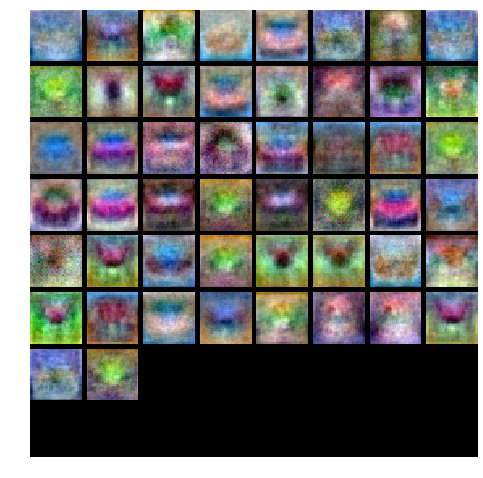

In [73]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [74]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.432
